![teks alternatif](https://drive.google.com/uc?id=1IXpcB3npQHTVFIcaC84dW-EHAOPJxCcG)

#COVID-19 TIME SERIES FORECASTING USING TENSOR FLOW

##1. Dataset

Data pada projek ini merupakan data runtun waktu jumlah penderita COVID-19 di Indonesia, baik data terkonfirmasi positif, meninggal dan sembuh. Data diperoleh dari https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset/data#.

Fitur Data: 
1. Lorem Ipsum
2. Lorem Ipsum
3. Lorem Ipsum
4. Lorem Ipsum

Jumlah Record Data:
Lorem Ipsum

Tanggal Data Diambil:
Lorem Ipsum

##2. Framing & Hypothesis
###Framing
Pada projek ini kami berusaha membentuk model runtun waktu guna memodelkan pertumbuhan data COVID-19 di Indonesia. Kemudian dilakukan prediksi untuk membantu pemerintah memahami persebaran atau pertumbuhan COVID-19 di Indonesia. 
###Hypothesis
Seperti yang telah kita ketahui, China berhasil menurunkan jumlah peenderita baru di Hubei pada beberapa waktu lalu. Oleh karena itu, China dikatakan telah melewati masa kritis COVID-19. Model coba disusun/dilatih menggunakan data dari pertumbuhan COVID-19 di Hubei China, hingga mengalami penurunan. Berdasarkan model ini akan diketahui perkiraan kapan Indonesia akan sampai pada fase yang sama dengan China. 

##3. Pemodelan
###A. Persiapan Data

In [0]:
#Mengaktifkan Library yang diperlukan dalam pemodelan
from numpy import array
from matplotlib import pyplot as plt
import pandas as pd 
import tensorflow as tf
import io
import numpy as np
from google.colab import files

In [41]:
#Mengimpor Data
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Covid19_Dataset.csv to Covid19_Dataset (1).csv
User uploaded file "Covid19_Dataset.csv" with length 4516 bytes


In [42]:
df=pd.read_csv(io.StringIO(uploaded['Covid19_Dataset.csv'].decode('utf-8')))
df.head()

,Date,Ind_Conf,Ind_Deaths,Ind_Rec,Hubei_Conf,Hubei_Deaths,Hubei_Rec,Italy_Conf,Italy_Deaths,Italy_Rec,Iran_Conf,Iran_Deaths,Iran_Rec,Spain_Conf,Spain_Deaths,Spain_Rec,Ger_Conf,Ger_Deaths,Ger_Rec
0,2020-01-22,0,0,0,444,17,28,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-01-23,0,0,0,444,17,28,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-01-24,0,0,0,549,24,31,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-01-25,0,0,0,761,40,32,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-01-26,0,0,0,1058,52,42,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# split a univariate sequence
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 

In [0]:
raw_seq = []
for i in range(len(df.Ind_Conf)):
  raw_seq.append(df.Ind_Conf[i])

In [44]:
print(raw_seq)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 4, 4, 6, 19, 27, 34, 34, 69, 96, 117, 134, 172, 227, 311, 369, 450, 514, 514]


In [0]:
# choose a number of time steps
n_steps = 3

In [0]:
# split into samples
X, y = split_sequence(raw_seq, n_steps)

In [0]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [48]:
# define model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

In [49]:
# fit model
model.fit(X, y, epochs=200, verbose=0)

In [0]:
length = len(raw_seq)

In [51]:
x_input = array([raw_seq[length-3], raw_seq[length-2], raw_seq[length-1]])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat[0][0])

566.5994


In [52]:
last_conf = raw_seq[length-1]
predict = yhat
print(last_conf)
print(predict)

514
[[566.5994]]


In [0]:
#Kenaikan kematian tiap hari
kenaikan = []
for i in range(len(df.Ind_Conf)-1):
  kenaikan.append(df.Ind_Conf[i+1]-df.Ind_Conf[i])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 13, 8, 7, 0, 35, 27, 21, 17, 38, 55, 84, 58, 81, 64, 0]


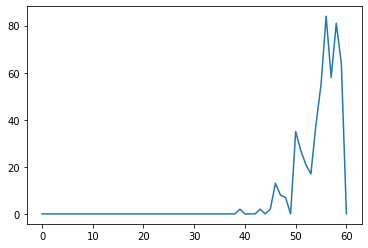

In [56]:
print(kenaikan)
plt.plot(kenaikan)

In [57]:
kenaikan_prediksi = predict - last_conf
print(kenaikan_prediksi)

[[52.599426]]


In [66]:
result = []
for i in range(len(df.Ind_Conf)-2):
  x_input = array([df.Ind_Conf[i], df.Ind_Conf[i+1], df.Ind_Conf[i+2]])
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat = model.predict(x_input, verbose=0)
  result.append(yhat[0][0])

np_array = np.array(result)
np_round = np.around(np_array, 0)
round_result = list(np_round)

print(round_result)

[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0, 3.0, 3.0, 3.0, 7.0, 9.0, 14.0, 29.0, 31.0, 46.0, 62.0, 95.0, 116.0, 137.0, 171.0, 226.0, 311.0, 369.0, 450.0, 515.0, 514.0, 567.0]


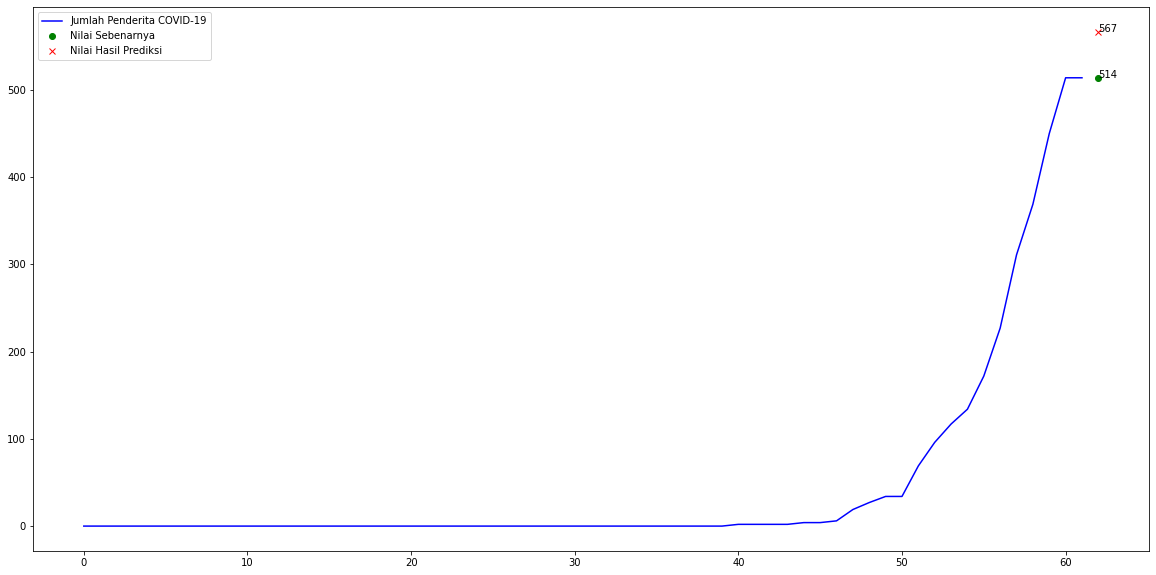

In [70]:
plt.figure(figsize=(20,10))
plt.plot(df.Ind_Conf, color='b', label='Jumlah Penderita COVID-19')
#plt.plot(result, color='b')
plt.plot(62,last_conf, 'go',label='Nilai Sebenarnya' )
plt.text(62,last_conf,'514')
plt.plot(62,predict, 'rx' ,label='Nilai Hasil Prediksi')
plt.text(62,predict,'567')
plt.legend()
plt.show()